## Lecture Housekeeping:

- The use of disrespectful language is prohibited in the questions, this is a supportive, learning environment for all - please engage accordingly.
    - Please review Code of Conduct (in Student Undertaking Agreement) if unsure
- No question is daft or silly - ask them!
- There are Q&A sessions midway and at the end of the session, should you wish to ask any follow-up questions.
- Should you have any questions after the lecture, please schedule a mentor session.
- For all non-academic questions, please submit a query: [www.hyperiondev.com/support](www.hyperiondev.com/support)

## Text Classification

#### Learning objectives

   - Introduction to Natural Language Processing
   - Learn how you can use spaCy to make your text-based programmes smarter

## Introduction

Natural language = human language (not programming language)

 - Phonetics and Phonology - linguistic sounds.
 - Morphology - meaningful components of words.
 - Syntax - structural relationships between words.
 - Semantics - knowledge of meaning.
 - Pragmatics - relationship of meaning to goals and intentions of speaker.
 - Discourse - linguistic units larger than a single utterance.
 
Lots of stuff for a computer to know!

### Ambiguity

Scenario - Tony is telling JARVIS that he was annoyed at a female worker, and threw a piece of paper. He then proceeds to say “I made her duck.”
How does JARVIS interpret this?

 - I cooked a duck for her.
 - I cooked a duck belonging to her.
 - I created the duck that she owns.
 - I caused her to quickly lower her head.
 - I turned her into a duck (possibly with the help of Dr. Strange?).

English (and natural languages generally) is weird and ambiguous. This makes it difficult for computers to navigate the way we speak.


## What does NLP aim to do?

Goal is to simulate human intelligence.
Machine Learning techniques used to train a model to understand human language.
Probability-based - therefore not always 100% accurate, but close enough, and getting closer every day!


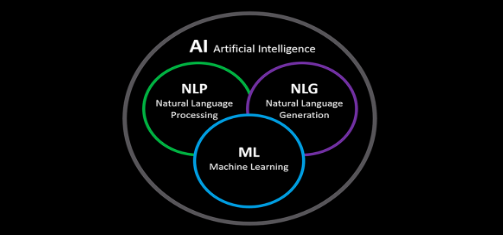


## SpaCy

A software package that comes with all of these models already! We won’t need to be generating models and training with data.
We give it a sentence, it gives us linguistic data about the sentence.


## SpaCy Demo

Let us look at some examples of how we can use SpaCy. 

In [9]:
# For install : 
# pip install spacy
# python -m spacy download en_core_web_sm
import spacy

# language model
nlp = spacy.load('en_core_web_sm')

# Text sample
sample = "The quick brown fox, jumps over the lazy dog."

Let's say you want to separate each word in this sentence to use in a program. If we were to go about doing this the "primitive" way, we would use the .split() method:

In [10]:
print(sample.split()) # Primitive, splits based on whitespaces

['The', 'quick', 'brown', 'fox,', 'jumps', 'over', 'the', 'lazy', 'dog.']


We can do better than that using SpaCy. When you pass the text through the nlp object, SpaCy tokenizes the text (splits it into individual words or tokens), performs part-of-speech tagging, named entity recognition, and other linguistic analyses

In [11]:
doc = nlp(sample)

# how spacey sees the sentence
print([token.orth_ for token in doc])


['The', 'quick', 'brown', 'fox', ',', 'jumps', 'over', 'the', 'lazy', 'dog', '.']


In [12]:
# leaving out the underscore gives the integer code of the word
print([(token, token.orth_, token.orth) for token in doc])

[(The, 'The', 5059648917813135842), (quick, 'quick', 12442504647632856847), (brown, 'brown', 15566893785393968193), (fox, 'fox', 4333436952782779665), (,, ',', 2593208677638477497), (jumps, 'jumps', 159845598865486485), (over, 'over', 5456543204961066030), (the, 'the', 7425985699627899538), (lazy, 'lazy', 8463806658378306174), (dog, 'dog', 7562983679033046312), (., '.', 12646065887601541794)]


### Stop words

Stop words are common words (like "and," "the," or "is") that are filtered out during text processing to focus on meaningful words and improve computational efficiency in natural language processing tasks.

In [13]:
# words that spacey thinks are stop words
for word in doc:
    if word.is_stop == True:
        print(word)

The
over
the


### Lemmatisation

Lemmatization in NLP is the process of reducing words to their base or root form, ensuring different forms of the same word are treated as a single word (e.g., "running" to "run")

In [14]:
# Lemmatisation gives the origin word
sample = "sing sang singing"
doc = nlp(sample)

print([token.lemma_ for token in doc])

['sing', 'sing', 'singing']


### Entity Recognition

Entity recognition involves identifying and classifying named entities (such as persons, organizations, or locations) in text, providing context and meaning to the words. 

In [6]:
wiki_priyanka = """known by her married name Priyanka Chopra Jonas, is an Indian actress,
singer, film producer, philanthropist, and the winner of the Miss World 2000 pageant.
One of India's highest-paid and most popular celebrities, Chopra has received numerous
awards, including a National Film Award and five Filmfare Awards. In 2016, the Government
of India honoured her with the Padma Shri, and Time named her one of the 100 most influential people in the world."""

nlp_priyanka = nlp(wiki_priyanka)
print([(i, i.label_, i.label) for i in nlp_priyanka.ents])

[(Priyanka Chopra Jonas, 'ORG', 383), (Indian, 'NORP', 381), (2000, 'DATE', 391), (One, 'CARDINAL', 397), (India, 'GPE', 384), (Chopra, 'ORG', 383), (five, 'CARDINAL', 397), (2016, 'DATE', 391), (India, 'GPE', 384), (the Padma Shri, 'PRODUCT', 386), (Time, 'ORG', 383), (one, 'CARDINAL', 397), (100, 'CARDINAL', 397)]


Of course, it is possible for us to not know what some entities mean. Fortunately, SpaCy can explain them to us.

In [15]:
entity_fac = spacy.explain("NORP")
print(f"NORP:{entity_fac}")

NORP:Nationalities or religious or political groups
